<img src="./notebooks_img/coruai.gif">

## Perceptron multi-capa

En el perceptron simple, somo capaces de diferencias las dos variables de forma independiente. Sin embargo, el hecho de tener la clasificiación basada en una sola capa (entrada y salida) no nos permite hacer una operación como el XOR.

XOR como puerta lógica, devuelve 1 cuando ambos valores son distintos:
    
    x0=0  x0=0  y0=0
    x1=1  x1=0  y1=1
    x2=0  x2=1  y1=1
    x3=1  x3=1  y1=0
    
Esta distribución, una unica capa no nos deja separa los casos. Si los vemos colocados en una gráfica, vemos rápidamente que no es posible con una sola línea. Esa capacidad la conseguimos agregando una primera capa interna.

<img src="https://nasirml.files.wordpress.com/2017/11/xor_11.png" width=240>

Más adelante veremos como definir esta mini red. Como siempre empezaremos por importar las librerías que nos hacen falta.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Workaround por un bug/conflicto entre la versión de matplot lib y OSX con clang-omp.
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

De la misma forma que hicimos con el perceptron creamos la parametrización e hyper-parametrización de la red.

- num_features: entradas de la red. Configura la capa de entrada.
- num_iter: iteraciónes a realizar por la red
- learning_rate: ratio de aprendizaje para la red, empezamos con el standard 0.01
- num_input: neuronas en al capa de entrada
- num_hidden: neuronas en la capa oculta 1
- num_output: neuronas de salida

<img src="https://nasirml.files.wordpress.com/2017/12/xor_2.png" width=320>

El perceptron simple, usa la capa de entrada y salida en la misma neurona.

In [2]:
num_features = 2
num_iter = 100000
display_step = int(num_iter / 10)
learning_rate = 0.01

num_input = 2          
num_hidden1 = 2        
num_output = 1         

Siguiendo la lógica del ejemplo anterior, pasamos a crear los datos de entrada y la salida esperada. Para TF todo es tratado como tensores (vectores multidimensionales), es por eso que la salida esperada tenemos que redimensionarla a un tensor (4x1).

Ha diferencia del AND del perceptron, la y en este caso es 1 paro los casos lógicos de una XOR.

In [3]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], np.float32)  # 4x2
y = np.array([0, 1, 1, 0], np.float32)                      # 4 a pelo esto nos funcionabia
y = np.reshape(y, [4,1])                                    # 4x1 para TF

Una vez más toca usar la API de TF. Recordemos que los placeholders son Variables que no tienen por que ser incializadas en el mismo momento, pero se reserva su espacio; las Variables en si, requiren inicialición en el mismo momento de crearse.

- X: representa los datos de entrada. Lo marcamos como placeholder ya que no se va a incializar hasta que se realice la asignación de variables.
- Y: representa la "etiquetas" 1|0 como salida de la red.
- weights: para los pesos se ha usado la notación implicita que permite TF (útil también para exportar pesos). En este caso, X cubre la entrada y solo necesitamos resevar espacio de Variable para los pesos de la primera capa y para la salida.
- biases: lo mismo que los pesos aplica a los segos, con la diferencia que que la dimensionlidad es 1. Recordemos que los sesgos se aplican como una entrada más a la red en cada capa.


In [4]:
X = tf.placeholder('float', [None, num_input]) 
Y = tf.placeholder('float', [None, num_output])    

# weights and biases
weights = {
    'w_h1' : tf.Variable(tf.random_normal([num_input, num_hidden1])), 
    'w_out': tf.Variable(tf.random_normal([num_hidden1, num_output]))
}

biases = {
    'b_h1' : tf.Variable(tf.zeros([num_hidden1])),
    'b_out': tf.Variable(tf.zeros([num_output]))
}

Ahora si, definimos la funcion 100% con metodos de tensor flow. Como se puede ver es un modelo sencillo. la x de entreda con los pesos y segos se usan para la definición de la primera capa oculta.

En este caso también usaremos un optimizador, gradiente descendente, para localizar el mínimo absoluto o el mínimo local lo más rápido posible.

Con Keras veremos que es más sencillo y claro de modelar. Con TF, al principio cuesta tener en mente como "anidar las capas" cuando vayamos a correr la sesion.

In [5]:
def multi_layer_perceptron_xor(x, weights, biases):

    hidden_layer1 = tf.add(tf.matmul(x, weights['w_h1']), biases['b_h1'])
    hidden_layer1 = tf.nn.sigmoid(hidden_layer1)

    out_layer = tf.add(tf.matmul(hidden_layer1, weights['w_out']), biases['b_out'])

    return out_layer

In [6]:
model = multi_layer_perceptron_xor(X, weights, biases)
loss_func = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss_func)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for k in range(num_iter):
    tmp_cost, _ = sess.run([loss_func, optimizer], feed_dict={X: x, Y: y})
    if k % display_step == 0:
        print('loss= ' + "{:.5f}".format(tmp_cost))

# separates the input space
W = np.squeeze(sess.run(weights['w_h1']))   # 2x2
b = np.squeeze(sess.run(biases['b_h1']))    # 2

sess.close()

loss= 3.16443
loss= 0.36769
loss= 0.08316
loss= 0.04526
loss= 0.03086
loss= 0.02335
loss= 0.01875
loss= 0.01565
loss= 0.01342
loss= 0.01175


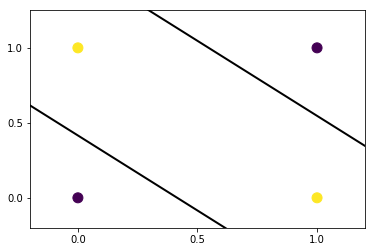

In [7]:
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y =  -1 / W[1, 0] * (W[0, 0] * plot_x + b[0])
plot_y = np.reshape(plot_y, [2, -1])
plot_y = np.squeeze(plot_y)

plot_y2 = -1 / W[1, 1] * (W[0, 1] * plot_x + b[1])
plot_y2 = np.reshape(plot_y2, [2, -1])
plot_y2 = np.squeeze(plot_y2)

y = np.reshape(y, [4]) 

plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.plot(plot_x, plot_y2, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.xticks([0.0, 0.5, 1.0])
plt.yticks([0.0, 0.5, 1.0])
plt.show()